#  WinpythonSlim Default checker

WinPythonSlim is a subset of WinPython, aiming for quick installation on a classrooms.

Command Line installation:

`WinPython-32bit-3.4.3.7Slim.exe /S /DIR=you_target_directory`

In [1]:
%matplotlib inline

##  Graphics: Matplotlib, Seaborn

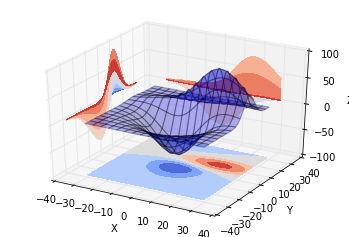

In [2]:
# Matplotlib
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)
cset = ax.contourf(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contourf(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_xlim(-40, 40)
ax.set_ylabel('Y')
ax.set_ylim(-40, 40)
ax.set_zlabel('Z')
ax.set_zlim(-100, 100)

plt.show()

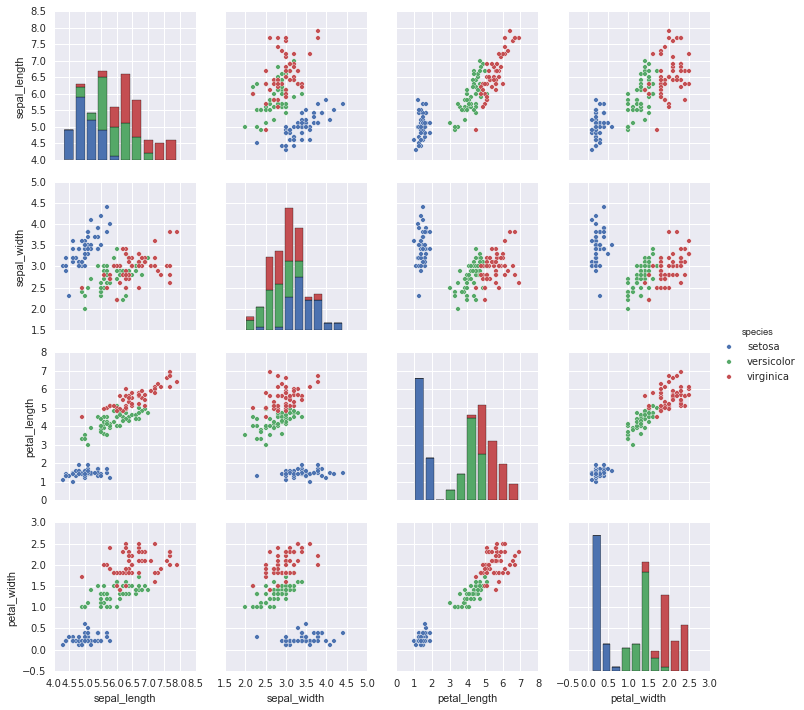

In [3]:
# Seaborn
import seaborn as sns
sns.set()
df = sns.load_dataset("iris")
sns.pairplot(df, hue="species", size=2.5)

## Qt4 & Qt5 Graphic libraries: PythonQwt, guidata, guiqwt

In [4]:
# Guidata (Python library generating graphical user interfaces for easy dataset editing and display)
from guidata import tests; tests.run()

Settings saved in:  D:\WinPython\basedir34\buildSlim\winpython-3.4.3\settings\.app.ini


In [5]:
# Guiqwt (Efficient 2D plotting Python library based on PythonQwt)
from guiqwt import tests; tests.run()

## Ipython Notebook: Interactivity & other

In [6]:
import IPython;IPython.__version__

'4.0.0'

In [8]:
# Audio Example : https://github.com/ipython/ipywidgets/blob/master/examples/Beat%20Frequencies.ipynb
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive
from IPython.display import Audio, display
def beat_freq(f1=220.0, f2=224.0):
    max_time = 3
    rate = 8000
    times = np.linspace(0,max_time,rate*max_time)
    signal = np.sin(2*np.pi*f1*times) + np.sin(2*np.pi*f2*times)
    print(f1, f2, abs(f1-f2))
    display(Audio(data=signal, rate=rate))
    return signal
v = interactive(beat_freq, f1=(200.0,300.0), f2=(200.0,300.0))
display(v)

220.0 224.0 4.0


array([  0.00000000e+00,   3.46966469e-01,   6.83408155e-01, ...,
        -6.83408155e-01,  -3.46966469e-01,   3.84296828e-13])

## Mathematical: statsmodels

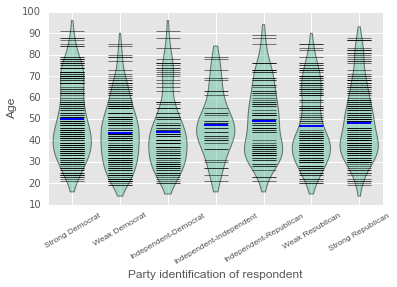

In [9]:
# checking statsmodels
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import statsmodels.api as sm
data = sm.datasets.anes96.load_pandas()
party_ID = np.arange(7)
labels = ["Strong Democrat", "Weak Democrat", "Independent-Democrat",
          "Independent-Independent", "Independent-Republican",
          "Weak Republican", "Strong Republican"]
plt.rcParams['figure.subplot.bottom'] = 0.23  # keep labels visible
plt.rcParams['figure.figsize'] = (6.0, 4.0)  # make plot larger in notebook
age = [data.exog['age'][data.endog == id] for id in party_ID]
fig = plt.figure()
ax = fig.add_subplot(111)
plot_opts={'cutoff_val':5, 'cutoff_type':'abs',
                                'label_fontsize':'small',
                                'label_rotation':30}
sm.graphics.beanplot(age, ax=ax, labels=labels,
                     plot_opts=plot_opts)
ax.set_xlabel("Party identification of respondent")
ax.set_ylabel("Age")

## SQL tools: sqlite, Ipython-sql, sqlite_bro, baresql, db.py

In [10]:
# checking Ipython-sql, sqlparse, SQLalchemy
%load_ext sql

In [11]:
%%sql sqlite:///.baresql.db
DROP TABLE IF EXISTS writer;
CREATE TABLE writer (first_name, last_name, year_of_death);
INSERT INTO writer VALUES ('William', 'Shakespeare', 1616);
INSERT INTO writer VALUES ('Bertold', 'Brecht', 1956);
SELECT  * , sqlite_version() as sqlite_version from Writer order by Year_of_death

Done.
Done.
1 rows affected.
1 rows affected.
Done.


first_name,last_name,year_of_death,sqlite_version
William,Shakespeare,1616,3.8.3.1
Bertold,Brecht,1956,3.8.3.1


In [12]:
# checking sqlite_bro: this should lanch a separate non-browser window with sqlite_bro's welcome
!cmd start cmd /C sqlite_bro

In [13]:
# checking baresql
from __future__ import print_function, unicode_literals, division  # line needed only if Python2.7
from baresql import baresql
bsql = baresql.baresql(connection="sqlite:///.baresql.db")
bsqldf = lambda q: bsql.df(q, dict(globals(),**locals()))

users = ['Alexander', 'Billy', 'Charles', 'Danielle', 'Esmeralda', 'Franz', 'Greg']
#  We use the python 'users' list like a SQL table
sql = "select 'Welcome ' ||  c0 || ' !' as say_hello, length(c0) as name_length from users$$ where c0 like '%a%' "
bsqldf(sql)

,say_hello,name_length
0,Welcome Alexander !,9
1,Welcome Charles !,7
2,Welcome Danielle !,8
3,Welcome Esmeralda !,9
4,Welcome Franz !,5


In [14]:
# checking db.py
from db import DB
db=DB(dbtype="sqlite", filename=".baresql.db")
db.query("select  sqlite_version() as sqlite_version  ;") 

Indexing schema. This will take a second...finished!


,sqlite_version
0,3.8.3.1


In [19]:
db.tables

Table,Columns
users$$,"index, c0"
writer,"first_name, last_name, year_of_death"


## DataFrames (Split, Apply, Combine): Pandas, Dask

In [20]:
#Pandas and the pipe operator (similar to  (%>%) pipe operator for R.)
import pandas as pd
import numpy as np

idx = pd.date_range('2000', '2005', freq='d', closed='left')
datas = pd.DataFrame({'A': np.random.randn(len(idx)), 
         'B': np.random.randn(len(idx)), 'C': idx.year},
          index=idx)
datas.head()

,A,B,C
2000-01-01,-2.046803,-0.151235,2000
2000-01-02,0.565519,-0.299443,2000
2000-01-03,1.483538,-0.274664,2000
2000-01-04,-0.150207,0.362840,2000
2000-01-05,1.364011,-0.187628,2000


In [21]:
datas.query('B > 0').groupby('C').size()

C
2000    179
2001    181
2002    191
2003    181
2004    188
dtype: int64

## Web Scraping: Beautifulsoup

In [22]:
# checking Web Scraping: beautifulsoup and requests 
import requests
from bs4 import BeautifulSoup

URL = 'http://en.wikipedia.org/wiki/Franklin,_Tennessee'

req = requests.get(URL, headers={'User-Agent' : "Mining the Social Web"})
soup = BeautifulSoup(req.text, "html5lib")

geoTag = soup.find(True, 'geo')

if geoTag and len(geoTag) > 1:
    lat = geoTag.find(True, 'latitude').string
    lon = geoTag.find(True, 'longitude').string
    print ('Location is at', lat, lon)
elif geoTag and len(geoTag) == 1:
    (lat, lon) = geoTag.string.split(';')
    (lat, lon) = (lat.strip(), lon.strip())
    print ('Location is at', lat, lon)
else:
    print ('No location found')

Location is at 35.92917 -86.85750


## Wrap-up

In [23]:
# optional scipy full test (takes up to 10 minutes)
#!cmd /C start cmd /k python.exe  -c "import scipy;scipy.test()"